<a href="https://colab.research.google.com/github/aditikutwal/Practice/blob/main/Haberman_Cancer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
col_name = ['Age','Operation Year', 'Axil_nodes', 'survival_status']
df = pd.read_csv("haberman.csv", header = None, names = col_name)
df = df.iloc[1: , :]

In [ ]:
df.head()

,Age,Operation Year,Axil_nodes,survival_status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1
5,31,65,4,1


In [ ]:
print (df.shape)
df["survival_status"].value_counts()

(306, 4)


1    225
2     81
Name: survival_status, dtype: int64

Using the given Dataset, we are trying to classify the survival status of a patient based on the given features like age, oepration year and axil nodes. 

# Univariate Anaysis

PDF

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


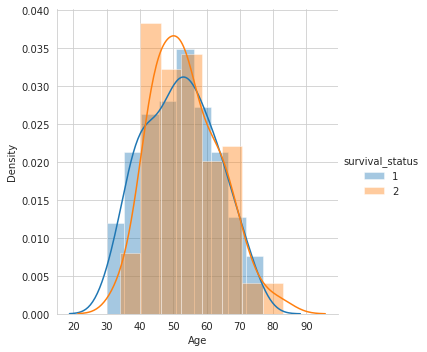

In [ ]:
sns.FacetGrid(df, hue="survival_status", size=5).map(sns.distplot, "Age").add_legend();
plt.show();

We have plotted the PDF of age and we can see that the status of survival is almost overlapping for all the ages. Hence we cannot make a distinction for status using the age feature.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


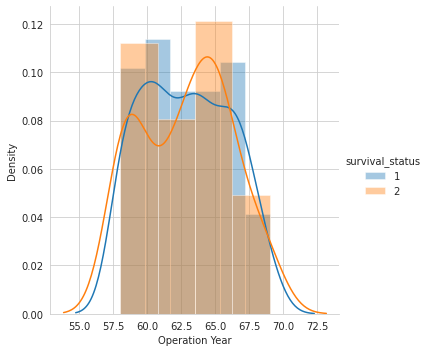

In [ ]:
sns.FacetGrid(df, hue='survival_status', size=5).map(sns.distplot, "Operation Year").add_legend();
plt.show();

The same can be said for the year feature. Year is anyways a time frame and it shouldn't affect any outcome.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


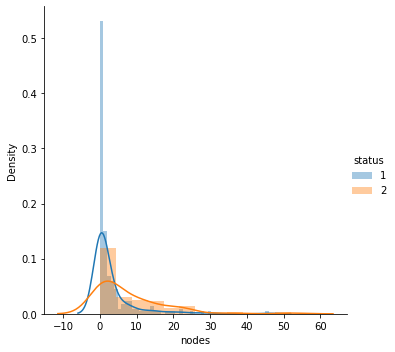

In [ ]:
sns.FacetGrid(df, hue='status', size=5).map(sns.distplot, "nodes").add_legend();
plt.show();

The number of nodes is also not a good classification feature for us to understand the condition for the status of the patient.

CDF

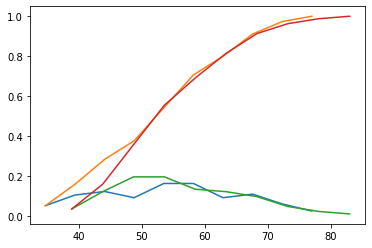

In [ ]:
df_1 = df.loc[df['status'] == 1]
df_2 = df.loc[df['status'] == 2]

counts, bin_edges = np.histogram(df_1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(df_2['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

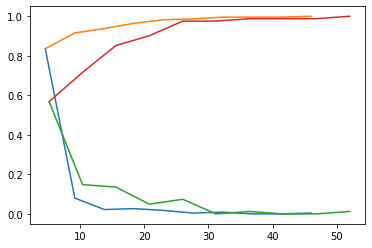

In [ ]:
counts, bin_edges = np.histogram(df_1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(df_2['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

Boxplot

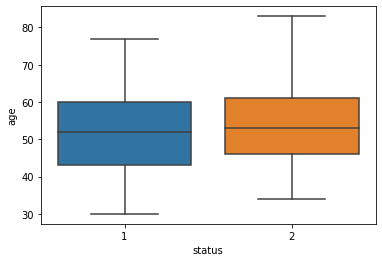

In [ ]:
sns.boxplot(x='status', y='age', data=df)
plt.show();

Violin Plot

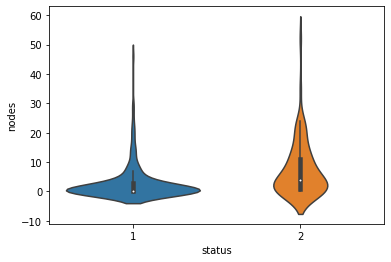

In [ ]:
sns.violinplot(x='status', y='nodes', data=df)
plt.show();

# Bivariate Analysis

2D Scatter Plots

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


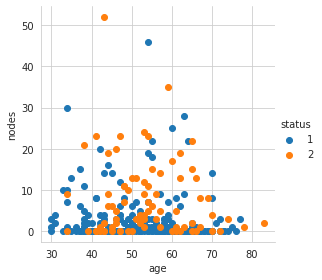

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='status', size=4).map(plt.scatter, "age", "nodes").add_legend();
plt.show();

Pair-plots

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


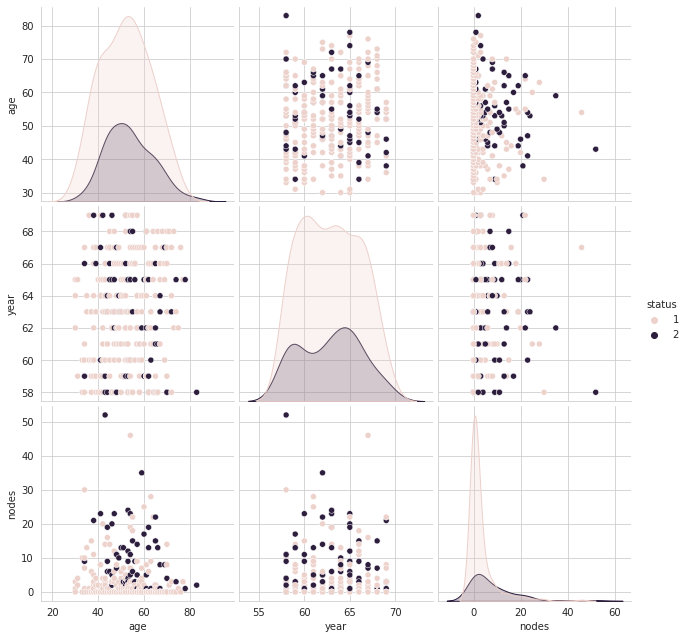

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df, hue='status', size=3);
plt.show();